In [2]:
pip install netron

     |████████████████████████████████| 1.4 MB 5.4 MB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from cv2 import cv2
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import netron

Mounted at /content/drive


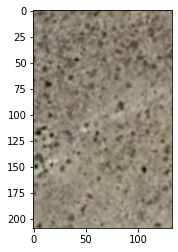

In [4]:
DATADIR = "/content/drive/MyDrive/Archive/td"
CATEGORIES = ["Soooth","Not Smooth"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      plt.imshow(img_array)
      plt.show()
      break
    break

In [5]:
print(img_array.shape)

(209, 133, 3)


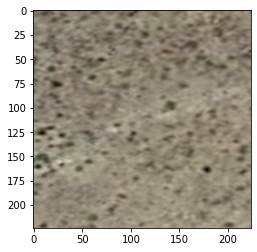

In [7]:
IMG_SIZE = 150

new_array = cv2.resize(img_array,(224,224))
plt.imshow(new_array)
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
              img_array = cv2.imread(os.path.join(path,img))
              new_array = cv2.resize(img_array,(224,224))
              training_data.append([new_array,class_num])
            except Exception as e:
              pass
create_training_data()

In [9]:
print(len(training_data))

263


In [10]:
import random
random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
1
1
1
1
1


In [14]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

x = np.array(X).reshape(-1,224,224,3)
y = np.array(y)

In [15]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
y = pickle.load(open("y.pickle","rb"))

In [17]:
X[1]

array([[[204, 193, 165],
        [202, 191, 164],
        [202, 191, 163],
        ...,
        [203, 190, 163],
        [203, 189, 163],
        [204, 190, 164]],

       [[203, 191, 163],
        [202, 191, 163],
        [201, 191, 162],
        ...,
        [204, 190, 164],
        [204, 190, 164],
        [204, 190, 164]],

       [[201, 190, 162],
        [201, 190, 162],
        [201, 190, 162],
        ...,
        [206, 192, 166],
        [205, 191, 165],
        [205, 191, 164]],

       ...,

       [[203, 191, 166],
        [203, 191, 166],
        [202, 190, 166],
        ...,
        [204, 193, 169],
        [204, 194, 170],
        [204, 193, 169]],

       [[202, 190, 164],
        [203, 191, 165],
        [203, 191, 165],
        ...,
        [202, 192, 170],
        [202, 191, 169],
        [202, 191, 169]],

       [[202, 190, 164],
        [202, 191, 164],
        [202, 190, 164],
        ...,
        [201, 190, 169],
        [201, 190, 168],
        [201, 190, 168]]

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
import datetime
from keras.initializers import glorot_uniform

In [19]:
X_train = tf.keras.utils.normalize(X, axis=1)
# plt.imshow(X_train[0],cmap=plt.cm.binary)
# plt.show()

In [20]:
X_train[1]

array([[[0.0672646 , 0.06782999, 0.06706934],
        [0.06667327, 0.06721749, 0.06674963],
        [0.06673946, 0.06727637, 0.06642136],
        ...,
        [0.06677659, 0.06650351, 0.06566799],
        [0.06682669, 0.06619678, 0.06573144],
        [0.06719402, 0.06660445, 0.06619175]],

       [[0.06693487, 0.06712709, 0.06625638],
        [0.06667327, 0.06721749, 0.06634262],
        [0.06640907, 0.06727637, 0.06601386],
        ...,
        [0.06710554, 0.06650351, 0.06607087],
        [0.06715588, 0.06654703, 0.0661347 ],
        [0.06719402, 0.06660445, 0.06619175]],

       [[0.06627542, 0.06677564, 0.0658499 ],
        [0.06634321, 0.06686556, 0.06593561],
        [0.06640907, 0.06692414, 0.06601386],
        ...,
        [0.06776343, 0.06720355, 0.06687661],
        [0.06748508, 0.06689727, 0.06653796],
        [0.0675234 , 0.066955  , 0.06619175]],

       ...,

       [[0.06693487, 0.06712709, 0.06747582],
        [0.06700334, 0.06721749, 0.06756365],
        [0.06673946, 0

In [21]:
model = Sequential()
model.add(Conv2D(128,(3,3),strides = (1,1),input_shape = X.shape[1:],padding='valid'));
model.add(Activation("relu"));
model.add(BatchNormalization());
# model.add(Dropout(0.2));
model.add(MaxPooling2D(pool_size=(2,2),padding="same"));

model.add(Conv2D(128,(3,3),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
# model.add(Dropout(0.2));
# model.add(MaxPooling2D(pool_size=(4,4)));


model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
# model.add(Dropout(0.2));
model.add(MaxPooling2D(pool_size=(2,2),padding="same"));

model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));

model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));

model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));

model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());

model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(Conv2D(128,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));

model.add(Conv2D(64,(4,4),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Dropout(0.2));
model.add(GlobalAveragePooling2D());

# model.add(Conv2D(64,(3,3),padding='same'));
# model.add(Activation("relu"));
# model.add(GlobalAveragePooling2D(pool_size=(2,2)));


model.add(Flatten());
# model.add(Dense(64));
# model.add(Activation("relu"))
# model.add(BatchNormalization());
# model.add(Dropout(0.2));

# model.add(Dense(64));
# model.add(Activation("relu"))
# model.add(BatchNormalization());
# model.add(Dropout(0.2));

model.add(Dense(1));
model.add(Activation("sigmoid"));

# filepath = 'best_model.epoch{epoch:02d}-loss{val_accuracy:.2f}.hdf5'
# checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=filepath, monitor='val_accuracy',save_best_only=True, mode='auto')
# Early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# LR_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2,mode='auto', min_delta=0.001, min_lr=0,)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])
# model.save('model.h5')
 
# netron.start('model.h5')
# dot_img_file = '/tmp/model_1.png'
# tf.keras.utils.plot_model(model, show_shapes=True)
history = model.fit(X_train,y,batch_size=32, epochs=50,validation_split = 0.1)


Epoch 1/50
8/8 [==============================] - 22s 965ms/step - loss: 0.6114 - accuracy: 0.7076 - val_loss: 0.6669 - val_accuracy: 0.6667
Epoch 2/50
8/8 [==============================] - 4s 441ms/step - loss: 0.4863 - accuracy: 0.7500 - val_loss: 0.6439 - val_accuracy: 0.6667
Epoch 3/50
8/8 [==============================] - 4s 441ms/step - loss: 0.4231 - accuracy: 0.8051 - val_loss: 0.6528 - val_accuracy: 0.6667
Epoch 4/50
8/8 [==============================] - 4s 443ms/step - loss: 0.4114 - accuracy: 0.8051 - val_loss: 0.7343 - val_accuracy: 0.6667
Epoch 5/50
8/8 [==============================] - 4s 443ms/step - loss: 0.3883 - accuracy: 0.8220 - val_loss: 0.7059 - val_accuracy: 0.6667
Epoch 6/50
8/8 [==============================] - 4s 446ms/step - loss: 0.3917 - accuracy: 0.8136 - val_loss: 0.7826 - val_accuracy: 0.6667
Epoch 7/50
8/8 [==============================] - 4s 444ms/step - loss: 0.3810 - accuracy: 0.8178 - val_loss: 0.8567 - val_accuracy: 0.6667
Epoch 8/50
8/8 [===

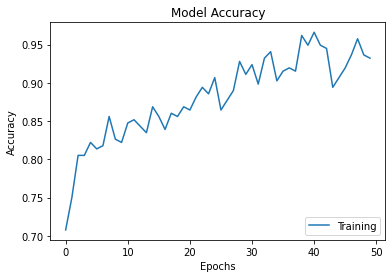

In [22]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training'], loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 400, 400, 1).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 400, 400, 1).astype('float32')

In [ ]:
# data_aug = ImageDataGenerator(rotation_range=180, width_shift_range=0.01, height_shift_range=0.01,zoom_range=0.6,horizontal_flip=True)
# data_aug.fit(X_train)
# aug = data_aug.flow(X_train[1:2], batch_size=32)


In [ ]:
history_data_aug = model.fit(X_train,y,batch_size=10, epochs=50, validation_split=0.1)

# cal

In [ ]:
import random
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
 horizontal_flip=True)
for i in range (50):
  chosen_image = random.choice(os.listdir("/content/drive/MyDrive/Archive/Soooth"))
  image_path = "/content/drive/MyDrive/Archive/Soooth/" + chosen_image
  image = np.expand_dims(plt.imread(image_path),0)
  aug_iter = gen.flow(image,save_to_dir="/content/drive/MyDrive/Archive/smooth_aug", save_prefix='aug-image-', save_format='png')
  aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

for i in range (50):
  chosen_image = random.choice(os.listdir("/content/drive/MyDrive/Archive/Not Smooth"))
  image_path = "/content/drive/MyDrive/Archive/Not Smooth/" + chosen_image
  image = np.expand_dims(plt.imread(image_path),0)
  aug_iter = gen.flow(image,save_to_dir="/content/drive/MyDrive/Archive/no_smooth_aug", save_prefix='aug-image-', save_format='png')
  aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]



In [ ]:
from google.colab.patches import cv2_imshow
import cv2
  
img = cv2.imread('100-megapixel-moon-detail.jpg')
  
# cv2.imread() -> takes an image as an input
h, w, channels = img.shape
  
half = w//8
half2 = h//8
  
# this will be the first column
left_part = img[half2:half2+half2, :half] 
borderoutput = cv2.copyMakeBorder(
    left_part, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[255, 255, 0])
 
# [:,:half] means all the rows and
# all the columns upto index half
  
# this will be the second column
right_part = img[:, half:]  
  
# [:,half:] means al the rows and all
# the columns from index half to the end
# cv2.imshow is used for displaying the image
cv2_imshow(borderoutput)
# cv2.imshow('Right part', right_part)
  
# this is horizontal division
# half2 = h//2
  
# top = img[:half2, :]
# bottom = img[half2:, :]
  
# cv2.imshow('Top', top)
# cv2.imshow('Bottom', bottom)
  
# saving all the images
# cv2.imwrite() function will save the image 
# into your pc
# cv2.imwrite('top.jpg', top)
# cv2.imwrite('bottom.jpg', bottom)
# cv2.imwrite('right.jpg', right_part)
# cv2.imwrite('left.jpg', left_part)
# cv2.waitKey(0)

AttributeError: ignored

In [27]:
from IPython.core.display import TextDisplayObject
from google.colab.patches import cv2_imshow
import cv2
  
img = plt.imread('Orcus_Patera_by_HRSC.jpeg')
results=img
w,h,channels= img.shape
# print(w)
# print(h)
# window_name = 'Image'
hor = w//6
ver = h//6
# print(hor)
# print(ver)
# hor = 112
# ver = 200
i=0
j=0
y = [0,1,2,3,4,5]
x = [0,1,2,3,4,5]
f=[]
g = 1
for j in (y):
  for i in (x):
    test = img[j*ver:(j*ver)+ver,i*hor:(i*hor)+hor]
    test1=cv2.resize(test,(224,224))
    test=test1.reshape(-1,224,224,3)
      # cv2.imwrite(str(g)+'im7.png', test)
      # g = g+1
    a=model.predict(test)
    print(a)
    f.append(a)
    if a == 1:
      startpoint=(j*ver,i*hor)
      endpoint = ((j*ver)+ver,(i*hor)+hor)
      results=cv2.rectangle(results,startpoint, endpoint,(255,0,0),5)
cv2_imshow(results)


[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]


error: ignored

In [ ]:
# for i in range (6):
#   for j in range (9):
i=0
j=0
test = img[j*ver:(j*ver)+ver, i*hor:(i*hor)+hor]
cv2_imshow(test)
test1=cv2.resize(test,(400,400))
test=test1.reshape(-1,400,400,1)
a=model.predict(test)
# if a == 1:
#     startpoint=(j*ver,i*hor)
#     endpoint = ((j*ver)+j*ver,(i*hor)+hor)
# results=cv2.rectangle(results,startpoint, endpoint, (255,0,0), 2)
    # cv2_imshow(test)


In [ ]:
# f=cv2.imread('test',0)
test1=cv2.resize(test,(400,400))
test=test.reshape(-1,400,400,1)
a=model.predict(test)
if a == 1:
  print(a)
else :
  print(2)

In [ ]:
if a == 1:
  print(1)
else :
  print(2)

In [ ]:
cv2_imshow(results)

In [ ]:
test = img[1*ver:(1*ver)+ver,1*hor:(1*hor)+hor]
# cv2_imshow(test)
test1=cv2.resize(test,(40,40))
test=test1.reshape(-1,40,40,3)
model.predict(test)

array([[1.]], dtype=float32)

In [ ]:
img = plt.imread('2img4.png')

In [ ]:
test1=cv2.resize(img,(40,40))
test=test1.reshape(-1,40,40,3)

In [ ]:
a = model.predict(test)

In [ ]:
print(a)

[[0.95205295]]


In [ ]:
img = plt.imread('2im7.png')

In [ ]:
test1=cv2.resize(img,(40,40))
test=test1.reshape(-1,40,40,3)

In [ ]:
a = model.predict(test)

In [ ]:
print(a)

[[0.9125845]]
